<h1>Car prices Prediction and Camparison using Linear regression and Lasso Regression 

In [1]:
# Importing the libreries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Tried to apply Lasso and linear model to campare the accuracy and get better target output.
from sklearn.linear_model import Lasso
# metrics from sklearn will be use to calculate the accuracy of data and much error will we get in actual and predicted data.
from sklearn import metrics

In [2]:
# Data Collection and Processing
data = pd.read_csv("car_data.csv")

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# checking the rows and columns
data.shape

(301, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# checking the distrubution of categories
print(data.Fuel_Type.value_counts())
print(data.Transmission.value_counts())
print(data.Seller_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [8]:
# Encoding Categorical Data, our ML model works better in Numbers other than subjective data.
data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace = True)
data.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace = True)
data.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace = True)


In [9]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [10]:
# splitting the data and Target
# X - Feature
# Y - predicive
X = data.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = data['Selling_Price']

In [11]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [12]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [13]:
# splitting test and train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [14]:
# Model Training
# Linear Regression Model
lin_reg_model = LinearRegression()

In [15]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

<h2>Model Evaluation

In [16]:
# Prediction on training data
training_data_pred = lin_reg_model.predict(X_train)

In [17]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_pred)

In [18]:
print("r squared error :", error_score)

r squared error : 0.8799451660493698


<h1> Visulizing the actual prices and predicted prices

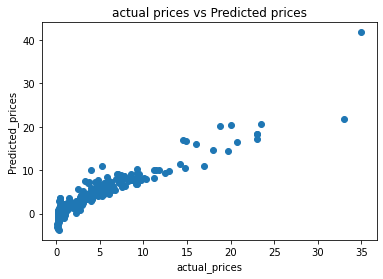

In [19]:
plt.scatter(Y_train, training_data_pred)
plt.xlabel("actual_prices")
plt.ylabel("Predicted_prices")
plt.title("actual prices vs Predicted prices")
plt.show()

In [20]:
# Time to check test data
test_data_pred = lin_reg_model.predict(X_test)

In [21]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_pred)
print("r squared error :", error_score)

r squared error : 0.8365766715026903


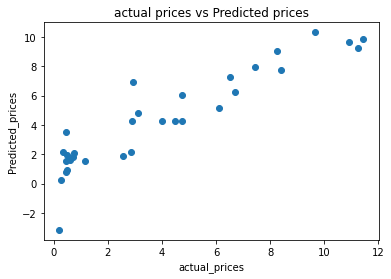

In [22]:
plt.scatter(Y_test, test_data_pred)
plt.xlabel("actual_prices")
plt.ylabel("Predicted_prices")
plt.title("actual prices vs Predicted prices")
plt.show()

<h1> Lasso Regression

In [23]:
# Model Training
# Linear Regression Model
Lasso_reg_model = Lasso()

In [24]:
Lasso_reg_model.fit(X_train, Y_train)

Lasso()

In [25]:
# Model Evaluation
# Prediction on training data
training_data_pred = Lasso_reg_model.predict(X_train)

In [26]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_pred)

In [27]:
print("r squared error :", error_score)

r squared error : 0.8427856123435794


<h1> Visulizing the actual prices and predicted prices

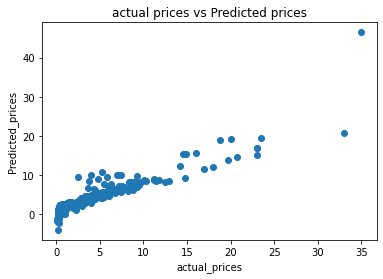

In [28]:
plt.scatter(Y_train, training_data_pred)
plt.xlabel("actual_prices")
plt.ylabel("Predicted_prices")
plt.title("actual prices vs Predicted prices")
plt.show()

In [29]:
# Time to check test data

In [30]:
test_data_pred = Lasso_reg_model.predict(X_test)

In [31]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_pred)
print("r squared error :", error_score)

r squared error : 0.8709167941173195


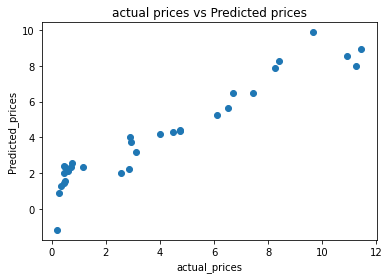

In [32]:
plt.scatter(Y_test, test_data_pred)
plt.xlabel("actual_prices")
plt.ylabel("Predicted_prices")
plt.title("actual prices vs Predicted prices")
plt.show()

In [34]:
print(test_data_pred)

[ 9.87888122  1.42396266  4.33267834  3.17313445  8.95590579  4.29397384
  3.73913632  5.66283974  0.91478394  5.25514316  6.47238818  4.39507335
  1.2955156   8.26559961  2.00292338  2.32529219  2.55349653  2.34742172
  7.96895166  4.18441245  2.3369918   7.86598537  2.02308236  8.56734786
  1.55498136  6.48561097  2.11427451 -1.18422036  4.01710445  2.21749695
  2.41820898]


In [46]:
df = pd. DataFrame({'Actual': Y_test, 'Predicted': test_data_pred})

In [54]:
df.head()

,Actual,Predicted
99,9.65,9.878881
161,0.45,1.423963
89,4.75,4.332678
30,3.10,3.173134
232,11.45,8.955906


From above prediction we can conclude that we were got better accuracy and prediction using lasso regression